In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load processed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values
y_test = pd.read_csv('y_test.csv').values

# Convert ke categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (483, 502)
Test data shape: (121, 502)


In [13]:
def create_model(input_shape, num_classes):
    model = models.Sequential([
        # Input layer
        # Input layer
        layers.Dense(256, input_shape=input_shape),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),  # Dropout untuk mencegah overfitting
        
        # Hidden layer 1
        layers.Dense(128),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
       # Hidden layer 2
        layers.Dense(64),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

# Inisialisasi model
model = create_model(input_shape=(X_train.shape[1],), num_classes=3)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Tampilkan ringkasan model
model.summary()

c:\Users\Semoga Berkah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       128,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,907 (671.51 KB)

 Trainable params: 171,011 (668.01 KB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
# Callback untuk early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,  # Menambah kesabaran untuk pembelajaran lebih lama
    restore_best_weights=True,
    mode='min'
)

# Callback untuk model checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras',  # Ganti ekstensi dari .h5 ke .keras
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Callback untuk learning rate reduction
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Menurunkan learning rate lebih cepat
    patience=3,  # Mengurangi kesabaran untuk perubahan
    min_lr=0.00001
)

In [15]:
# Training model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

# Load best model (gunakan ekstensi .keras)
best_model = tf.keras.models.load_model('best_model.keras')  # Perbaiki ekstensi

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4660 - loss: 1.1332
Epoch 1: val_accuracy improved from -inf to 0.27835, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.4718 - loss: 1.1234 - val_accuracy: 0.2784 - val_loss: 1.0756 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6476 - loss: 0.8323
Epoch 2: val_accuracy improved from 0.27835 to 0.29897, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6496 - loss: 0.8282 - val_accuracy: 0.2990 - val_loss: 1.2914 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6956 - loss: 0.7762
Epoch 3: val_accuracy improved from 0.29897 to 0.30928, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6947 - loss: 0.7777 - val_accuracy: 0.3093 - val_loss: 1.1765 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - ac

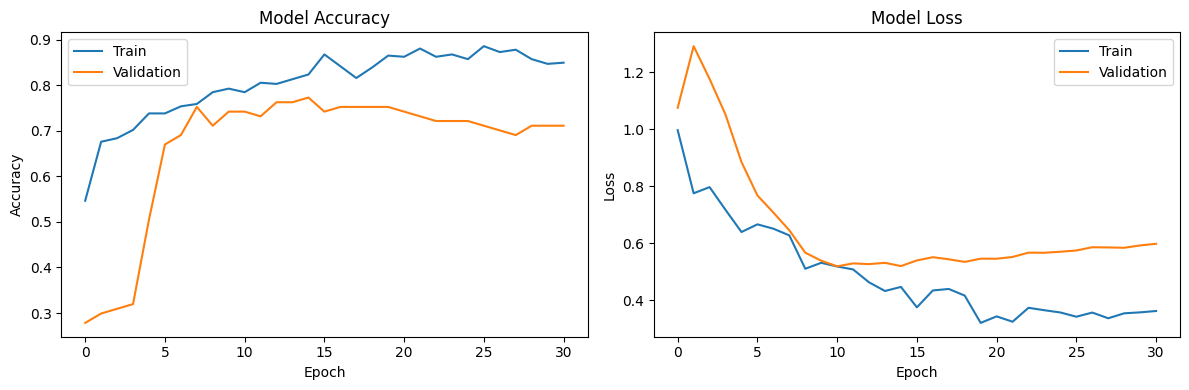

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step

Classification Report:
              precision    recall  f1-score   support

        Easy       0.76      0.90      0.82        49
      Medium       0.78      0.54      0.64        26
        Hard       0.71      0.70      0.70        46

    accuracy                           0.74       121
   macro avg       0.75      0.71      0.72       121
weighted avg       0.74      0.74      0.74       121



In [16]:
# Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

# Plot hasil training
plot_training_history(history)

# Evaluasi model
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, 
                          target_names=['Easy', 'Medium', 'Hard']))

In [17]:
def predict_difficulty(question_data, model, preprocessor):
    """
    Memprediksi tingkat kesulitan soal baru
    
    Parameters:
    question_data (dict): Dictionary berisi data soal
    model: Model TensorFlow yang sudah dilatih
    preprocessor: Instance dari class DataPreprocessor
    
    Returns:
    str: Label tingkat kesulitan (Easy, Medium, Hard)
    float: Confidence score
    """
    # Preprocess data
    processed_data = preprocessor.preprocess_new_data(question_data)
    
    # Prediksi
    prediction = model.predict(processed_data)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    # Convert ke label
    difficulty_labels = ['Easy', 'Medium', 'Hard']
    predicted_label = difficulty_labels[predicted_class]
    
    return predicted_label, confidence

# Contoh penggunaan
def classify_question(question_text, preprocessor, model):
    """
    Fungsi utama untuk klasifikasi soal
    """
    # Prepare data
    question_data = {
        'Problem': question_text,
        'response_time': 0,  # Akan diupdate setelah soal dijawab
        'upload_timestamp': pd.Timestamp.now(),
        'solved_timestamp': None
    }
    
    # Prediksi difficulty
    difficulty, confidence = predict_difficulty(question_data, model, preprocessor)
    
    return {
        'difficulty': difficulty,
        'confidence': confidence,
        'timestamp': pd.Timestamp.now()
    }

In [23]:
class DataPreprocessor:
    def __init__(self):
        # Inisialisasi parameter atau objek yang diperlukan untuk preprocessing
        pass
    
    def preprocess_new_data(self, question_data):
        # Implementasi preprocessing
        pass

# Inisialisasi preprocessor
preprocessor = DataPreprocessor()

In [24]:
# Simpan model dan preprocessor
model.save('question_classifier_model.keras')  # Format yang dianjurkan

import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')  # Menyimpan preprocessor dengan joblib

['preprocessor.pkl']